In [ ]:
import pandas as pd

In [ ]:
ceaps = pd.read_csv('/content/dataset_ceaps_forecasting.csv')
ceaps

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(ceaps)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuia_ccqt/6pprdhir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuia_ccqt/6cyaii7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81327', 'data', 'file=/tmp/tmpuia_ccqt/6pprdhir.json', 'init=/tmp/tmpuia_ccqt/6cyaii7p.json', 'output', 'file=/tmp/tmpuia_ccqt/prophet_modelr2zy0sbe/prophet_model-20230111184352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
proximos_tres_meses = m.make_future_dataframe(periods = 90)
proximos_tres_meses

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1546,2022-03-27
1547,2022-03-28
1548,2022-03-29
1549,2022-03-30


In [ ]:
previsao = m.predict(proximos_tres_meses)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,72585.360314,19996.295867,122828.134862
1,2018-01-02,54868.932034,7305.497251,109799.416610
2,2018-01-03,57482.342540,2685.433819,111308.829060
3,2018-01-04,45486.501617,-9680.471846,98703.786508
4,2018-01-05,34819.333993,-15212.997573,85039.586749
...,...,...,...,...
1546,2022-03-27,26060.525727,-25685.811061,85153.795569
1547,2022-03-28,112116.212457,55989.684731,164277.131473
1548,2022-03-29,96391.901539,43483.135283,146803.779433
1549,2022-03-30,100506.990268,48278.274328,152705.936154


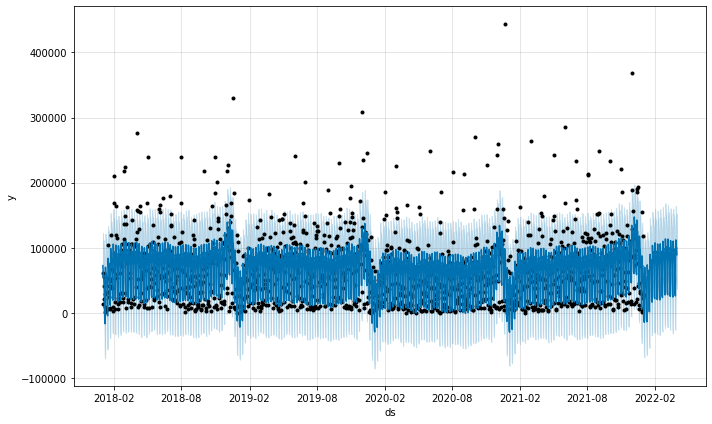

In [ ]:
fig1 = m.plot(previsao)

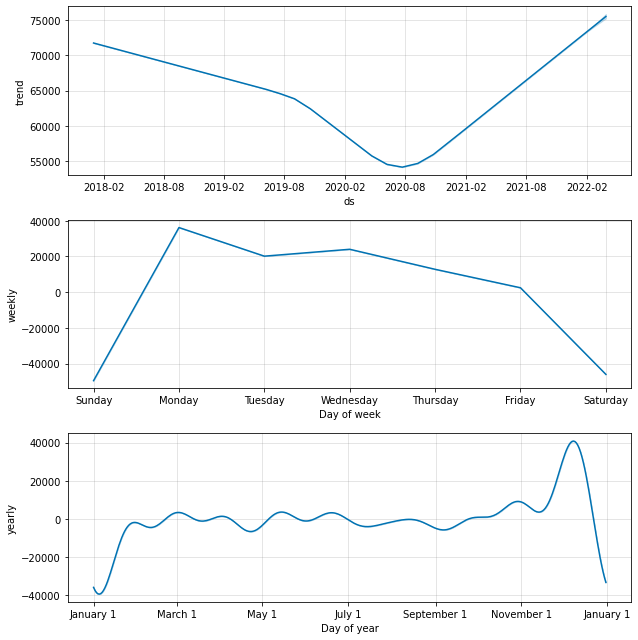

In [ ]:
fig2 = m.plot_components(previsao)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, previsao)

In [ ]:
plot_components_plotly(m, previsao)